<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.utils import shuffle

In [2]:
#load dtaset from my github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [4]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Split: 0.05  Depth: 27  Nodes: 3239  Train set accuracy: 1.0  Test set Accuracy: 0.6018518518518519
Split: 0.1  Depth: 28  Nodes: 3149  Train set accuracy: 1.0  Test set Accuracy: 0.6321483771251932
Split: 0.15  Depth: 23  Nodes: 2911  Train set accuracy: 1.0  Test set Accuracy: 0.5969072164948453
Split: 0.2  Depth: 28  Nodes: 2799  Train set accuracy: 1.0  Test set Accuracy: 0.6078886310904872
Split: 0.3  Depth: 29  Nodes: 2557  Train set accuracy: 1.0  Test set Accuracy: 0.5977307890665291
Split: 0.4  Depth: 25  Nodes: 2199  Train set accuracy: 1.0  Test set Accuracy: 0.5555125725338491
Split: 0.5  Depth: 25  Nodes: 1889  Train set accuracy: 1.0  Test set Accuracy: 0.5605075827917053
Split: 0.6  Depth: 25  Nodes: 1499  Train set accuracy: 1.0  Test set Accuracy: 0.5439773020376579


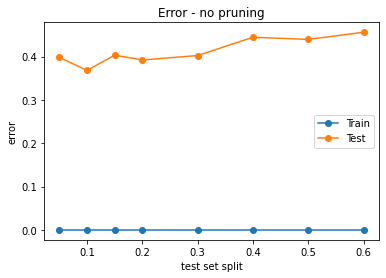

In [7]:
#decision tree classifer vs splits for no pruning
train_acc = []
test_acc = []
train_err = []
test_err = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=14, stratify=y)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini')

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   train_err.append(1-train_acc[i])
   test_err.append(1-test_acc[i]) 
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

#plot results
pyplot.plot(splits, train_err , '-o', label='Train')
pyplot.plot(splits, test_err, '-o', label='Test')
pyplot.title('Error - no pruning')
pyplot.ylabel('error')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()


Split: 0.05  Depth: 4  Nodes: 31  Train set accuracy: 0.5520612677203846  Test set Accuracy: 0.5833333333333334
Split: 0.1  Depth: 4  Nodes: 31  Train set accuracy: 0.5538355693154455  Test set Accuracy: 0.5502318392581144
Split: 0.15  Depth: 4  Nodes: 31  Train set accuracy: 0.5545437989437261  Test set Accuracy: 0.5536082474226804
Split: 0.2  Depth: 4  Nodes: 31  Train set accuracy: 0.5505030959752322  Test set Accuracy: 0.5436968290796597
Split: 0.3  Depth: 4  Nodes: 31  Train set accuracy: 0.5537372843874392  Test set Accuracy: 0.5281072717895823
Split: 0.4  Depth: 4  Nodes: 31  Train set accuracy: 0.5686274509803921  Test set Accuracy: 0.539651837524178
Split: 0.5  Depth: 4  Nodes: 29  Train set accuracy: 0.5681114551083591  Test set Accuracy: 0.5379139585267719
Split: 0.6  Depth: 4  Nodes: 31  Train set accuracy: 0.5619195046439629  Test set Accuracy: 0.5352076347691515


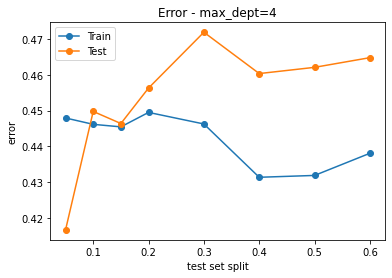

In [12]:
#decision tree classifer vs splits for max_depth
train_acc = []
test_acc = []
train_err = []
test_err = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=5, stratify=y)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=4)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   train_err.append(1-train_acc[i])
   test_err.append(1-test_acc[i]) 
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])


#plot results
pyplot.plot(splits, train_err , '-o', label='Train')
pyplot.plot(splits, test_err, '-o', label='Test')
pyplot.title('Error - max_dept=4')
pyplot.ylabel('error')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()

1 ) Depth: 1  Nodes: 3  Train set accuracy: 0.4891640866873065  Test set Accuracy: 0.4918793503480278
2 ) Depth: 2  Nodes: 7  Train set accuracy: 0.526702786377709  Test set Accuracy: 0.5336426914153132
3 ) Depth: 3  Nodes: 15  Train set accuracy: 0.5375386996904025  Test set Accuracy: 0.5421500386697602
4 ) Depth: 4  Nodes: 31  Train set accuracy: 0.5485681114551083  Test set Accuracy: 0.5529775715390565
5 ) Depth: 5  Nodes: 63  Train set accuracy: 0.5681114551083591  Test set Accuracy: 0.5614849187935035
6 ) Depth: 6  Nodes: 125  Train set accuracy: 0.5855263157894737  Test set Accuracy: 0.5560711523588554
7 ) Depth: 7  Nodes: 217  Train set accuracy: 0.6087461300309598  Test set Accuracy: 0.5692188708430008
8 ) Depth: 8  Nodes: 365  Train set accuracy: 0.6451238390092879  Test set Accuracy: 0.563031709203403
9 ) Depth: 9  Nodes: 571  Train set accuracy: 0.6927244582043344  Test set Accuracy: 0.5568445475638051
10 ) Depth: 10  Nodes: 837  Train set accuracy: 0.7438080495356038  Test 

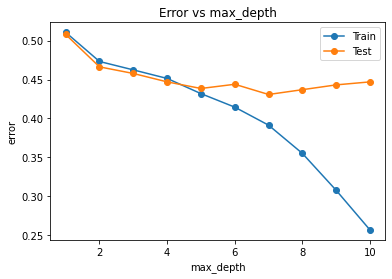

In [14]:
#decision tree classifer with max_depth
train_acc = []
test_acc = []
train_err = []
test_err = []
save_model = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)
max_depth_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in max_depth_set:
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=i)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   if i==1:
      pick_model = model
   save_model.append(model)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   train_err.append(1-train_acc[i-1])
   test_err.append(1-test_acc[i-1])

   #print tree attributes
   print(i, ") Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i-1], " Test set Accuracy:",test_acc[i-1])

print(save_model)
#plot results vs tree depth
pyplot.plot(max_depth_set, train_err , '-o', label='Train')
pyplot.plot(max_depth_set, test_err, '-o', label='Test')
pyplot.title('Error vs max_depth')
pyplot.ylabel('error')
pyplot.xlabel('max_depth')
pyplot.legend()
pyplot.show()

0 0.0  Depth: 20  Nodes: 859  Train set accuracy: 0.809017027863777  Test set Accuracy: 0.5893271461716937
1 0.00025  Depth: 16  Nodes: 271  Train set accuracy: 0.6664086687306502  Test set Accuracy: 0.5622583139984532
2 0.0005  Depth: 9  Nodes: 103  Train set accuracy: 0.600812693498452  Test set Accuracy: 0.5460170146945089
3 0.00075  Depth: 8  Nodes: 55  Train set accuracy: 0.5671439628482973  Test set Accuracy: 0.5467904098994586
4 0.001  Depth: 8  Nodes: 47  Train set accuracy: 0.5626934984520123  Test set Accuracy: 0.5475638051044084
5 0.00125  Depth: 6  Nodes: 23  Train set accuracy: 0.5460526315789473  Test set Accuracy: 0.5328692962103635
6 0.0015  Depth: 4  Nodes: 15  Train set accuracy: 0.5340557275541795  Test set Accuracy: 0.525908739365816
7 0.00175  Depth: 4  Nodes: 13  Train set accuracy: 0.5340557275541795  Test set Accuracy: 0.525908739365816
8 0.002  Depth: 3  Nodes: 9  Train set accuracy: 0.5296052631578947  Test set Accuracy: 0.5266821345707656
9 0.00225  Depth: 3 

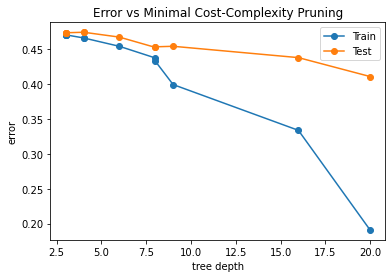

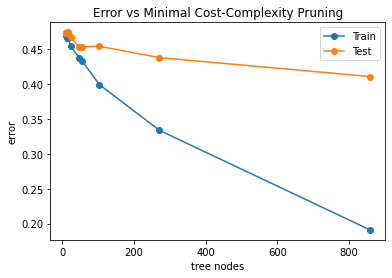

In [16]:
#decision tree classifer with Minimal Cost-Complexity Pruning 

train_acc = []
test_acc = []
train_err = []
test_err = []
treenodes = []
treedepth = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, stratify=y)

for i in range(0,12):
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', ccp_alpha=(i+2)/4000)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   train_err.append(1-train_acc[i])
   test_err.append(1-test_acc[i])
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print(i, i/4000, " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i], " Test set Accuracy:",test_acc[i])


#plot results vs tree depth
pyplot.plot(treedepth, train_err , '-o', label='Train')
pyplot.plot(treedepth, test_err, '-o', label='Test')
pyplot.title('Error vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('error')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

#plot results vs number of nodes
pyplot.plot(treenodes, train_err , '-o', label='Train')
pyplot.plot(treenodes, test_err, '-o', label='Test')
pyplot.title('Error vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('error')
pyplot.xlabel('tree nodes')
pyplot.legend()
pyplot.show()

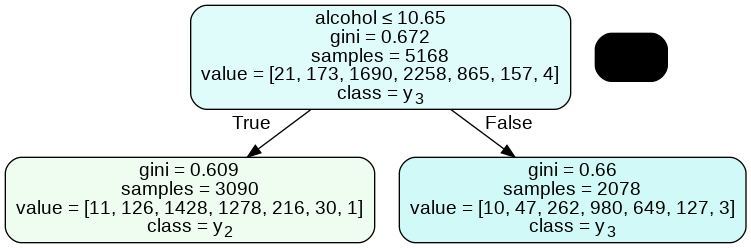

In [ ]:
#Option to plot decision tree 
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

features=x.columns
dot_data = StringIO()
export_graphviz(pick_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features, class_names=True )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())